In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Ai-Model/

/content/drive/MyDrive/Ai-Model


In [3]:
!git clone https://github.com/sunsmarterjie/yolov12.git

fatal: destination path 'yolov12' already exists and is not an empty directory.


In [4]:
%cd /content/drive/MyDrive/Ai-Model/yolov12


/content/drive/MyDrive/Ai-Model/yolov12


In [8]:
!wget https://github.com/Dao-AILab/flash-attention/releases/download/v2.7.3/flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl

--2025-10-26 04:26:38--  https://github.com/Dao-AILab/flash-attention/releases/download/v2.7.3/flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/494232964/b7fb7022-424c-4ac2-b46b-a41f386edaa5?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-26T05%3A03%3A48Z&rscd=attachment%3B+filename%3Dflash_attn-2.7.3%2Bcu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-26T04%3A02%3A50Z&ske=2025-10-26T05%3A03%3A48Z&sks=b&skv=2018-11-09&sig=1V5mq5ZKG6ja3MOQFTvD8%2FOysyDKEJEnKfi5q78HDYs%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNv

In [7]:
!pip install --no-build-isolation flash-attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.8.3-cp312-cp312-linux_x86_64.whl size=256040057 sha256=f25da18657a87fc83dc1bfb8b7751b82246e9db355510226b674fd437c34b5fb
  Stored in directory: /root/.cache/pip/wheels/3d/59/46/f282c12c73dd4bb3c2e3fe199f1a0d0f8cec06df0cccfeee27
Successfully built flash-attn


In [6]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/Ai-Model/yolov12
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.63-0.editable-py3-none-any.whl size=20255 sha256=63ac77779c1ce0ca2215657760511273c52399b8b2f4344e3c61588274506206
  Stored in directory: /tmp/pip-ephem-wheel-cache-8w2v4raf/wheels/9d/9d/61/ffd9da0c5b52ae3211015dcb44a9a84d637cb811753aad0c9f
Successfully built ultralytics


Training the model

In [ ]:
from ultralytics import YOLO

# Load a new, clean model architecture
model = YOLO('yolov12n.yaml')

# Train the model with your new dataset
# Replace this path with the location of your 'data.yaml' file
results = model.train(
  data='/content/drive/MyDrive/Ai-Model/Labeled MRI Brain Tumor Dataset.v1-version-1.yolov12/data.yaml',
  epochs=50,
  batch=16,
  imgsz=640,
  patience=50, # Helps prevent overfitting
  device='0', # Use the first GPU
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.202 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.yaml, data=/content/drive/MyDrive/Ai-Model/Labeled MRI Brain Tumor Dataset.v1-version-1.yolov12/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, 

100%|██████████| 755k/755k [00:00<00:00, 147MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      2368  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2, 1, 2]          
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2, 1, 4]          
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    174720  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Ai-Model/Labeled MRI Brain Tumor Dataset.v1-version-1.yolov12/train/labels.cache... 1695 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1699/1699 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/drive/MyDrive/Ai-Model/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/MyDrive/Ai-Model/Labeled MRI Brain Tumor Dataset.v1-version-1.yolov12/valid/labels.cache... 502 images, 0 backgrounds, 0 corrupt: 100%|██████████| 502/502 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.59G      3.562      5.429      4.143          4        640: 100%|██████████| 107/107 [09:29<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]

                   all        502        505   0.000541      0.211   0.000636   0.000205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       3.7G      3.215      4.763      3.498          4        640: 100%|██████████| 107/107 [00:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        502        505    0.00203      0.451    0.00824    0.00284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.69G      2.916      4.054      3.043          5        640: 100%|██████████| 107/107 [00:46<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.30it/s]

                   all        502        505      0.525     0.0767     0.0131    0.00385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       3.7G      2.724       3.59      2.863          7        640: 100%|██████████| 107/107 [00:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]

                   all        502        505      0.506      0.154      0.147      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       3.7G      2.522      3.196      2.667          4        640: 100%|██████████| 107/107 [00:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]

                   all        502        505      0.346      0.307      0.219     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       3.7G      2.366      2.932      2.548          6        640: 100%|██████████| 107/107 [00:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]

                   all        502        505      0.423       0.32      0.302      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.69G      2.299       2.76       2.46          8        640: 100%|██████████| 107/107 [00:45<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        502        505      0.469      0.377      0.351      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       3.7G      2.201      2.533      2.381          9        640: 100%|██████████| 107/107 [00:46<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.41it/s]

                   all        502        505      0.415      0.418      0.383      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.7G      2.129      2.388      2.332          3        640: 100%|██████████| 107/107 [00:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        502        505      0.496      0.347      0.322      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       3.7G      2.065      2.225      2.251          4        640: 100%|██████████| 107/107 [00:46<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        502        505      0.454      0.549      0.488      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.69G      1.985      2.115      2.178          5        640: 100%|██████████| 107/107 [00:45<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]

                   all        502        505      0.549      0.511      0.536      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       3.7G       1.95      2.061       2.14          4        640: 100%|██████████| 107/107 [00:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]

                   all        502        505      0.536      0.462      0.504      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       3.7G      1.949      2.027       2.15          5        640: 100%|██████████| 107/107 [00:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]

                   all        502        505       0.57      0.533      0.565      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.7G      1.889      1.921      2.078          3        640: 100%|██████████| 107/107 [00:47<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]

                   all        502        505      0.594      0.449      0.527      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.69G      1.878      1.879      2.068          7        640: 100%|██████████| 107/107 [00:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]

                   all        502        505      0.773      0.534      0.653      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       3.7G      1.848      1.819      2.023          8        640: 100%|██████████| 107/107 [00:45<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.67it/s]

                   all        502        505      0.692      0.554      0.631      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.7G      1.787      1.753      1.974          7        640: 100%|██████████| 107/107 [00:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]

                   all        502        505      0.673      0.547      0.638      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       3.7G      1.817      1.737      1.993          3        640: 100%|██████████| 107/107 [00:44<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        502        505      0.558      0.639      0.654      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.69G      1.774      1.714      1.952          7        640: 100%|██████████| 107/107 [00:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.45it/s]

                   all        502        505      0.651      0.609      0.645      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.7G      1.771      1.669      1.956          8        640: 100%|██████████| 107/107 [00:44<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]

                   all        502        505      0.725      0.573      0.654      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.7G      1.749      1.649      1.936          2        640: 100%|██████████| 107/107 [00:46<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.55it/s]

                   all        502        505      0.706      0.648      0.699      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.7G      1.738       1.62      1.922          6        640: 100%|██████████| 107/107 [00:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.30it/s]

                   all        502        505      0.694      0.643      0.713      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.69G      1.723      1.579      1.903          5        640: 100%|██████████| 107/107 [00:45<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.77it/s]

                   all        502        505      0.698      0.642      0.714        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       3.7G      1.734      1.608      1.913          3        640: 100%|██████████| 107/107 [00:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]

                   all        502        505      0.675       0.68      0.723      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.7G      1.692       1.59      1.887          8        640: 100%|██████████| 107/107 [00:46<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]

                   all        502        505      0.702      0.643       0.72      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.7G      1.709      1.554      1.886          9        640: 100%|██████████| 107/107 [00:44<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]

                   all        502        505      0.673        0.7      0.749       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.69G        1.7      1.545      1.878          6        640: 100%|██████████| 107/107 [00:44<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        502        505      0.738      0.629      0.711      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       3.7G      1.659      1.523      1.866          3        640: 100%|██████████| 107/107 [00:45<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.14it/s]

                   all        502        505      0.734      0.676      0.757      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.7G      1.664      1.489      1.826          5        640: 100%|██████████| 107/107 [00:44<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.35it/s]

                   all        502        505      0.738      0.648      0.732      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.7G      1.644      1.477      1.841          4        640: 100%|██████████| 107/107 [00:44<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.78it/s]

                   all        502        505      0.718      0.674      0.744      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.69G      1.657      1.452      1.847          3        640: 100%|██████████| 107/107 [00:45<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        502        505      0.786       0.66      0.761      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.7G      1.628      1.423      1.825          5        640: 100%|██████████| 107/107 [00:46<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.30it/s]

                   all        502        505      0.741      0.671      0.751      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.7G      1.639      1.444      1.837          6        640: 100%|██████████| 107/107 [00:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]

                   all        502        505      0.828      0.693        0.8      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.7G      1.611      1.386      1.805          3        640: 100%|██████████| 107/107 [00:45<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]

                   all        502        505      0.813      0.696      0.812      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.69G      1.622      1.384      1.819          2        640: 100%|██████████| 107/107 [00:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        502        505      0.763      0.711      0.778      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.7G      1.579      1.385      1.793          5        640: 100%|██████████| 107/107 [00:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.53it/s]

                   all        502        505      0.795      0.725      0.802      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.7G      1.597      1.349      1.775          3        640: 100%|██████████| 107/107 [00:46<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.69it/s]

                   all        502        505      0.783      0.723      0.798      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.7G      1.587      1.353      1.782          6        640: 100%|██████████| 107/107 [00:45<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.55it/s]

                   all        502        505      0.783      0.727      0.801      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.69G      1.592      1.356      1.798          4        640: 100%|██████████| 107/107 [00:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]

                   all        502        505      0.789      0.757      0.817      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.7G      1.587      1.321      1.789          4        640: 100%|██████████| 107/107 [00:45<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.34it/s]

                   all        502        505      0.778      0.713        0.8      0.454


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/drive/MyDrive/Ai-Model/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       3.7G      1.563      1.344      1.941          3        640: 100%|██████████| 107/107 [00:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        502        505      0.739      0.742      0.792      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.7G      1.528      1.222       1.92          3        640: 100%|██████████| 107/107 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.28it/s]

                   all        502        505      0.802      0.756      0.823      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.69G      1.516      1.198      1.907          3        640: 100%|██████████| 107/107 [00:43<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        502        505      0.793       0.78      0.837      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.7G      1.501      1.162      1.898          3        640: 100%|██████████| 107/107 [00:46<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.78it/s]

                   all        502        505      0.818      0.763      0.841      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       3.7G      1.505      1.158      1.901          3        640: 100%|██████████| 107/107 [00:43<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]

                   all        502        505      0.823      0.759      0.837      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.7G      1.484      1.125      1.873          3        640: 100%|██████████| 107/107 [00:44<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]

                   all        502        505      0.834      0.756      0.837      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.69G      1.476       1.11      1.868          3        640: 100%|██████████| 107/107 [00:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.35it/s]

                   all        502        505      0.816      0.783      0.852      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       3.7G       1.47      1.116      1.861          3        640: 100%|██████████| 107/107 [00:46<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]

                   all        502        505      0.839      0.775      0.853      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       3.7G      1.467      1.094      1.869          3        640: 100%|██████████| 107/107 [00:44<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.72it/s]

                   all        502        505      0.846      0.774      0.854      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       3.7G      1.445      1.086      1.852          3        640: 100%|██████████| 107/107 [00:44<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.43it/s]

                   all        502        505      0.832      0.783      0.855      0.502



50 epochs completed in 0.883 hours.
Optimizer stripped from /content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 376 layers, 2,509,124 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]


                   all        502        505      0.829      0.781      0.854      0.502
                Glioma        161        163      0.835      0.497      0.702      0.367
            Meningioma        124        125      0.844      0.821      0.876      0.481
              No Tumor         99         99      0.788      0.909      0.916      0.681
             Pituitary        118        118      0.851      0.898      0.924       0.48
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset/Training/glioma/Tr-gl_0042.jpg: 640x640 2 Gliomas, 13.2ms
image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset/Training/glioma/Tr

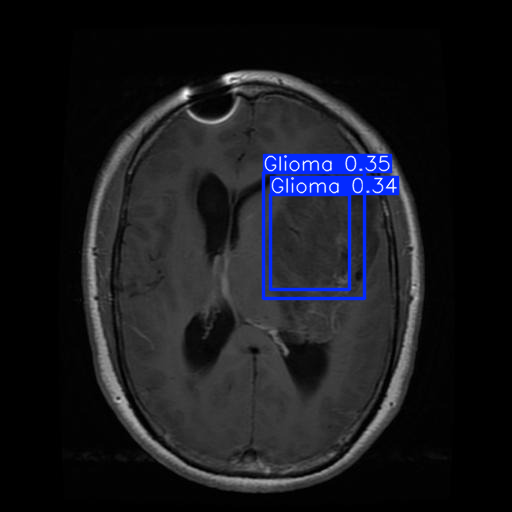

In [9]:
from ultralytics import YOLO

# Load your newly trained model
model = YOLO('/content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/best.pt')

# Run inference on a sample image
# Replace the path with the image you want to test
results = model("/content/drive/MyDrive/Ai-Model/Brain-tumor-dataset/Training/glioma/Tr-gl_0042.jpg",)

# Show the results with bounding boxes and labels
results[0].show()

to train dataset


In [ ]:
import os
import shutil
from ultralytics import YOLO

# -------- CONFIG ---------
MODEL_PATH = "/content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/best.pt"
UNLABELED_PATH = "/content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training"
LABELED_PATH = "/content/drive/MyDrive/Ai-Model/labeled_images"
LOW_CONF_PATH = "/content/drive/MyDrive/Ai-Model/need_train"
CONF_THRESHOLD = 0.5
# -------------------------

# Load model
model = YOLO(MODEL_PATH)

# Create output root folders
os.makedirs(LABELED_PATH, exist_ok=True)
os.makedirs(LOW_CONF_PATH, exist_ok=True)

# Process each class folder
for cls in os.listdir(UNLABELED_PATH):
    cls_path = os.path.join(UNLABELED_PATH, cls)
    if not os.path.isdir(cls_path):
        continue

    # make sure class subfolders exist
    os.makedirs(os.path.join(LABELED_PATH, cls), exist_ok=True)
    os.makedirs(os.path.join(LOW_CONF_PATH, cls), exist_ok=True)

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        # Skip non-images
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            print(f"⚠️ Skipping non-image file: {img_name}")
            continue

        print(f"🔎 Processing {img_path} ...")

        results = model(img_path, conf=0.01)
        result = results[0]

        if len(result.boxes) == 0:
            print(f"❌ No detection → LOW confidence → {img_name}")
            dst_dir = os.path.join(LOW_CONF_PATH, cls)
            os.makedirs(dst_dir, exist_ok=True)
            shutil.copy(img_path, os.path.join(dst_dir, img_name))
            continue

        # pick highest confidence detection
        best_box = max(result.boxes, key=lambda b: b.conf)
        conf = float(best_box.conf)

        if conf >= CONF_THRESHOLD:
            print(f"✅ HIGH confidence ({conf:.2f}) → Saving {img_name}")

            # copy image
            dst_dir = os.path.join(LABELED_PATH, cls)
            os.makedirs(dst_dir, exist_ok=True)
            save_img_path = os.path.join(dst_dir, img_name)
            shutil.copy(img_path, save_img_path)

            # save YOLO-format label
            txt_name = os.path.splitext(img_name)[0] + ".txt"
            save_txt_path = os.path.join(dst_dir, txt_name)

            cls_id = int(best_box.cls)
            x_center, y_center, width, height = best_box.xywhn[0].tolist()

            with open(save_txt_path, "w") as f:
                f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        else:
            print(f"⚠️ LOW confidence ({conf:.2f}) → Moving {img_name}")
            dst_dir = os.path.join(LOW_CONF_PATH, cls)
            os.makedirs(dst_dir, exist_ok=True)
            shutil.copy(img_path, os.path.join(dst_dir, img_name))

print("🎯 Done! Check your Drive: 'labeled_images/' for confident detections and 'need_train/' for low-confidence ones.")


Streaming output truncated to the last 5000 lines.

image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/glioma/Tr-gl_0433.jpg: 640x640 10 Gliomas, 1 Meningioma, 1 Pituitary, 465.0ms
Speed: 7.2ms preprocess, 465.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
✅ HIGH confidence (0.64) → Saving Tr-gl_0433.jpg
🔎 Processing /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/glioma/Tr-gl_0403.jpg ...

image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/glioma/Tr-gl_0403.jpg: 640x640 20 Gliomas, 326.2ms
Speed: 6.4ms preprocess, 326.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
⚠️ LOW confidence (0.32) → Moving Tr-gl_0403.jpg
🔎 Processing /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/glioma/Tr-gl_0431.jpg ...

image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/glioma/Tr-gl_0431.jpg: 640x640 6 Gliomas, 2 Meningiomas, 313.7ms
Speed: 6.2ms preprocess, 313.7ms in

In [ ]:
import os
import shutil
import yaml
from ultralytics import YOLO

# -------- CONFIG ---------
MODEL_PATH = "/content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/best.pt"
DATASET_PATH = "/content/drive/MyDrive/Ai-Model/need_train"
OUTPUT_PATH = "/content/drive/MyDrive/Ai-Model/final_labeled"

CLASS_NAMES = ["glioma", "meningioma", "notumor", "pituitary"]  # must match your training classes
# -------------------------

# Load trained YOLO model
model = YOLO(MODEL_PATH)

# Create YOLO-style folder structure
images_out = os.path.join(OUTPUT_PATH, "images")
labels_out = os.path.join(OUTPUT_PATH, "labels")
os.makedirs(images_out, exist_ok=True)
os.makedirs(labels_out, exist_ok=True)

# Process all class subfolders
for cls in os.listdir(DATASET_PATH):
    cls_path = os.path.join(DATASET_PATH, cls)
    if not os.path.isdir(cls_path):
        continue

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        # Skip non-images
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            continue

        print(f"🔎 Processing {img_path} ...")

        results = model(img_path, conf=0.01)
        result = results[0]

        if len(result.boxes) == 0:
            print(f"❌ No detections → Skipping {img_name}")
            continue

        # Pick the highest confidence bounding box
        best_box = result.boxes[result.boxes.conf.argmax().item()]

        # Ensure unique name by prefixing class folder
        unique_name = f"{cls}_{img_name}"

        # Copy image to images/ folder
        save_img_path = os.path.join(images_out, unique_name)
        shutil.copy(img_path, save_img_path)

        # Create YOLO-format .txt with ONLY the highest-confidence box
        txt_name = os.path.splitext(unique_name)[0] + ".txt"
        save_txt_path = os.path.join(labels_out, txt_name)

        with open(save_txt_path, "w") as f:
            cls_id = int(best_box.cls.item())
            x_center, y_center, width, height = best_box.xywhn.cpu().numpy()[0]
            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        print(f"✅ Saved {unique_name} with label at {labels_out}")

# -------- Create data.yaml --------
yaml_path = os.path.join(OUTPUT_PATH, "data.yaml")
data = {
    "train": os.path.join(OUTPUT_PATH, "images"),
    "val": os.path.join(OUTPUT_PATH, "images"),  # you can later split into train/val
    "nc": len(CLASS_NAMES),
    "names": CLASS_NAMES
}

with open(yaml_path, "w") as f:
    yaml.dump(data, f, default_flow_style=False)

print(f"🎯 Done! YOLO dataset created at: {OUTPUT_PATH}")
print(f"➡️ data.yaml saved at: {yaml_path}")


Streaming output truncated to the last 5000 lines.
image 1/1 /content/drive/MyDrive/Ai-Model/need_train/pituitary/Tr-pi_1188.jpg: 640x640 1 Glioma, 1 Meningioma, 1 No Tumor, 2 Pituitarys, 474.5ms
Speed: 7.1ms preprocess, 474.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
✅ Saved pituitary_Tr-pi_1188.jpg with label at /content/drive/MyDrive/Ai-Model/final_labeled/labels
🔎 Processing /content/drive/MyDrive/Ai-Model/need_train/pituitary/Tr-pi_1192.jpg ...

image 1/1 /content/drive/MyDrive/Ai-Model/need_train/pituitary/Tr-pi_1192.jpg: 640x640 2 Pituitarys, 457.3ms
Speed: 6.1ms preprocess, 457.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
✅ Saved pituitary_Tr-pi_1192.jpg with label at /content/drive/MyDrive/Ai-Model/final_labeled/labels
🔎 Processing /content/drive/MyDrive/Ai-Model/need_train/pituitary/Tr-pi_1186.jpg ...

image 1/1 /content/drive/MyDrive/Ai-Model/need_train/pituitary/Tr-pi_1186.jpg: 640x640 2 Gliomas, 2 Meningiomas, 4 Pituitarys, 

In [ ]:
import os
from ultralytics import YOLO

# -------- CONFIG ---------
MODEL_PATH = "/content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/best.pt"  # existing trained model
DATA_YAML = "/content/drive/MyDrive/Ai-Model/final_labeled/data.yaml"  # dataset config (train+val)
OUTPUT_DIR = "/content/drive/MyDrive/Ai-Model/fine_tuned"  # where to save fine-tuned model
EPOCHS = 50
IMG_SIZE = 640
# -------------------------

# Load existing trained model
model = YOLO(MODEL_PATH)

# Fine-tune on low-confidence + original data
results = model.train(
    data=DATA_YAML,    # dataset (images + labels)
    epochs=EPOCHS,     # training cycles
    imgsz=IMG_SIZE,    # input image size
    project=OUTPUT_DIR,
    name="low_conf_finetune",
    exist_ok=True,
    device='0'
)

print("🎯 Fine-tuning complete! Check your model at:", os.path.join(OUTPUT_DIR, "low_conf_finetune"))


New https://pypi.org/project/ultralytics/8.3.202 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Ai-Model/yolov12/runs/detect/train12/weights/best.pt, data=/content/drive/MyDrive/Ai-Model/final_labeled/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Ai-Model/fine_tuned, name=low_conf_finetune, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, st

train: Scanning /content/drive/MyDrive/Ai-Model/final_labeled/labels... 1630 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1630/1630 [00:45<00:00, 35.80it/s]


train: New cache created: /content/drive/MyDrive/Ai-Model/final_labeled/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/drive/MyDrive/Ai-Model/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /content/drive/MyDrive/Ai-Model/final_labeled/labels.cache... 1630 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1630/1630 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Ai-Model/fine_tuned/low_conf_finetune/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/Ai-Model/fine_tuned/low_conf_finetune
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.543      1.886      1.726         23        640: 100%|██████████| 102/102 [41:56<00:00, 24.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [15:45<00:00, 18.53s/it]

                   all       1630       1630      0.572      0.665      0.657      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.543      1.843      1.697         23        640: 100%|██████████| 102/102 [41:20<00:00, 24.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [14:56<00:00, 17.58s/it]

                   all       1630       1630      0.441       0.59      0.485      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.598      1.882      1.754         26        640:  11%|█         | 11/102 [04:38<38:33, 25.43s/it]

In [ ]:
import os
import shutil
from ultralytics import YOLO

# -------- CONFIG ---------
MODEL_PATH = "/content/drive/MyDrive/best (2).pt"
UNLABELED_PATH = "/content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training"
SAVE_PATH = "/content/drive/MyDrive/new dataset with high"
CONF_THRESHOLD = 0.9   # ✅ 90% confidence
# -------------------------

# Load model
model = YOLO(MODEL_PATH)

# Create root save folder
os.makedirs(SAVE_PATH, exist_ok=True)

# Process each tumor-type folder
for cls in os.listdir(UNLABELED_PATH):
    cls_path = os.path.join(UNLABELED_PATH, cls)
    if not os.path.isdir(cls_path):
        continue

    # Make same subfolder inside SAVE_PATH
    dst_cls_path = os.path.join(SAVE_PATH, cls)
    os.makedirs(dst_cls_path, exist_ok=True)

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            print(f"⚠️ Skipping non-image file: {img_name}")
            continue

        print(f"🔎 Processing {img_path} ...")

        results = model(img_path, conf=0.01)
        result = results[0]

        if len(result.boxes) == 0:
            print(f"❌ No detection → Skipping {img_name}")
            continue

        # take the highest-confidence detection
        best_box = max(result.boxes, key=lambda b: b.conf)
        conf = float(best_box.conf)

        if conf >= CONF_THRESHOLD:
            print(f"✅ HIGH confidence ({conf:.2f}) → Saving {img_name}")
            shutil.copy(img_path, os.path.join(dst_cls_path, img_name))

print("🎯 Done! High-confidence images are saved in 'high_conf_images/' with same tumor-type subfolders.")

Streaming output truncated to the last 5000 lines.

image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/pituitary/Tr-pi_1145.jpg: 640x640 1 pituitary, 31.1ms
Speed: 3.6ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
🔎 Processing /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/pituitary/Tr-pi_1053.jpg ...

image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/pituitary/Tr-pi_1053.jpg: 640x640 2 gliomas, 2 pituitarys, 30.6ms
Speed: 3.6ms preprocess, 30.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
✅ HIGH confidence (0.93) → Saving Tr-pi_1053.jpg
🔎 Processing /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/pituitary/Tr-pi_1056.jpg ...

image 1/1 /content/drive/MyDrive/Ai-Model/Brain-tumor-dataset11/Training/pituitary/Tr-pi_1056.jpg: 640x640 1 glioma, 2 pituitarys, 30.5ms
Speed: 4.0ms preprocess, 30.5ms inference, 6.1ms postprocess per image at shape (1, 3, 64

In [ ]:
# ✅ Uninstall old ultralytics
!pip uninstall ultralytics -y

# ✅ (Optional) Uninstall flash-attn if it causes issues
# ✅ Install the latest official ultralytics
!pip install ultralytics --upgrade


Found existing installation: ultralytics 8.3.63
Uninstalling ultralytics-8.3.63:
  Successfully uninstalled ultralytics-8.3.63
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.9 MB/s eta 0:00:00
